In [1]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Topic Modeling In N L P: Topic Modeling - 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# =================================================-
#### Slide 2/21: Load packages  ####

# Builtin packages.
from pathlib import Path
from pprint import pprint

# 3rd party packages.
import gensim
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download(["punkt", "stopwords"])

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# =================================================-
#### Slide 3/21: Directory settings  ####

# Set 'main_dir' to location of the project folder
# Path("data").mkdir(exist_ok=True)
Path("plot").mkdir(exist_ok=True)

In [5]:
# =================================================-
#### Slide 5/21: Load data  ####

# Let's load and prepare the dataset for creating Document-Term Matrix
df = pd.read_csv("data/NYT_article_data.csv")
df.head()

,web_url,headline,snippet,word_count,source,type_of_material,date,id
0,https://www.nytimes.com/reuters/2019/01/01/spo...,"Kyrgios, Murray Power Into Second Round in Bri...",Nick Kyrgios started his Brisbane Open title d...,435,Reuters,News,2019-01-01,8
1,https://www.nytimes.com/reuters/2019/01/01/wor...,UK Police Treating Manchester Stabbing Attack ...,British police confirmed on Tuesday they were ...,81,Reuters,News,2019-01-01,9
2,https://www.nytimes.com/aponline/2019/01/01/sp...,Former NFL Player Wiley Talks Playoffs on Podc...,Marcellus Wiley is still on the fence about le...,272,AP,News,2019-01-01,10
3,https://www.nytimes.com/2019/01/09/arts/design...,"After the Quake, Dana Schutz Gets Back to Work",Still reckoning with the fallout from her Emme...,1540,The New York Times,News,2019-01-09,11
4,https://www.nytimes.com/aponline/2019/01/10/sp...,Ogunbowale Helps Irish Beat Cardinals in 1-2 S...,As far as Arike Ogunbowale and coach Muffet Mc...,1059,AP,News,2019-01-11,12


In [6]:
# =================================================-
#### Slide 6/21: Check for NAs  ####

# Print total number of NAs.
print(df["snippet"].isna().sum())
# Drop NAs if any.
df = df.dropna(subset=["snippet"]).reset_index(drop=True)
print(df["snippet"].isna().sum())
# Isolate the `snippet` column.
df_text = df["snippet"]

0
0


In [7]:
uni = TfidfVectorizer()
bi = TfidfVectorizer(ngram_range=(2,2))
tri = TfidfVectorizer(ngram_range=(3,3))

In [8]:
uni_df = pd.DataFrame(uni.fit_transform(df_text).toarray(), columns=uni.get_feature_names_out())

In [9]:
bi_df = pd.DataFrame(bi.fit_transform(df_text).toarray(), columns=bi.get_feature_names_out())
tri_df = pd.DataFrame(tri.fit_transform(df_text).toarray(), columns=tri.get_feature_names_out())

In [10]:
tri_df

,000 in january,10 billion according,10 others all,10 pointers and,10 year prison,100 million per,102 year old,106 100 victory,109 victory on,10th straight win,...,young women of,your daily look,your head we,your money lasts,your neighborhood or,your own adventure,yourself that you,yuan rather than,zimbabwe president has,zykera rice added
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166982,0.0
231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [11]:
# =================================================-
#### Slide 7/21: Tokenization: split each document into words  ####

# Tokenize each document into a large list of tokenized documents.
df_tokenized = [word_tokenize(df_text[i]) for i in range(0, len(df_text))]

In [12]:
# =================================================-
#### Slide 9/21: Convert characters to lowercase  ####

# Let's take a look at the first tokenized document
document_words = df_tokenized[0]
print(document_words)
# 1. Convert to lowercase.
document_words = [word.lower() for word in document_words]
print(document_words[:10])

['Nick', 'Kyrgios', 'started', 'his', 'Brisbane', 'Open', 'title', 'defense', 'with', 'a', 'battling', '7-6', '(', '5', ')', '5-7', '7-6', '(', '5', ')', 'victory', 'over', 'American', 'Ryan', 'Harrison', 'in', 'the', 'opening', 'round', 'on', 'Tuesday', '.']
['nick', 'kyrgios', 'started', 'his', 'brisbane', 'open', 'title', 'defense', 'with', 'a']


In [13]:
# =================================================-
#### Slide 10/21: Remove stop words  ####

# 2. Remove stop words.
# Get common English stop words.
stop_words = stopwords.words("english")
print(stop_words[:10])
# Remove stop words.
document_words = [word for word in document_words if not word in stop_words]
print(document_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', '7-6', '(']


In [14]:
# =================================================-
#### Slide 11/21: Remove non-alphabetical characters  ####

# 3. Remove punctuation and any non-alphabetical characters.
document_words = [word for word in document_words if word.isalpha()]
print(document_words[:10])

['nick', 'kyrgios', 'started', 'brisbane', 'open', 'title', 'defense', 'battling', 'victory', 'american']


In [15]:
# =================================================-
#### Slide 14/21: Stem words  ####

# 4. Stem words.
document_words = [PorterStemmer().stem(word) for word in document_words]
print(document_words[:10])

['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american']


In [16]:
# =================================================-
#### Slide 16/21: Clean the entire corpus  ####

# Create a list for clean documents.
df_clean = [None] * len(df_tokenized)
# Create a list of word counts for each clean document.
word_counts_per_document = [None] * len(df_tokenized)

# Process words in all documents.
for i in range(len(df_tokenized)):
    # 1. Convert to lowercase.
    df_clean[i] = [document.lower() for document in df_tokenized[i]]

    # 2. Remove stop words.
    df_clean[i] = [word for word in df_clean[i] if not word in stop_words]

    # 3. Remove punctuation and any non-alphabetical characters.
    df_clean[i] = [word for word in df_clean[i] if word.isalpha()]

    # 4. Stem words.
    df_clean[i] = [PorterStemmer().stem(word) for word in df_clean[i]]

    # Record the word count per document.
    word_counts_per_document[i] = len(df_clean[i])

In [17]:
# =================================================-
#### Slide 17/21: Clean the entire corpus (cont'd)  ####

# Convert word counts list and documents list to NumPy arrays.
word_counts_array = np.array(word_counts_per_document)
df_array = np.array(df_clean, dtype=object)

# Find indices of all documents where there are greater than or equal to 5 words.
valid_documents = np.where(word_counts_array >= 5)[0]

# Subset the df_array to keep only those where there are at least 5 words.
df_array = df_array[valid_documents]

# Convert the array back to a list.
df_clean = df_array.tolist()  # <- the processed documents

print(df_clean[0:2])

# Convert word counts list and documents list to NumPy arrays.
word_counts_array = np.array(word_counts_per_document)
df_array = np.array(df_clean, dtype=object)

[['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday'], ['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi']]


In [18]:
# =================================================-
#### Slide 18/21: Clean corpus  ####

# Print the first 5 documents of clean corpus
df_array[:5]


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

array([list(['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday']),
       list(['british', 'polic', 'confirm', 'tuesday', 'treat', 'stab', 'attack', 'injur', 'three', 'peopl', 'manchest', 'victoria', 'train', 'station', 'terrorist', 'investig', 'search', 'address', 'cheetham', 'hill', 'area', 'citi']),
       list(['marcellu', 'wiley', 'still', 'fenc', 'let', 'young', 'son', 'play', 'footbal', 'former', 'nfl', 'defens', 'end', 'fox', 'sport', 'person', 'tell', 'podcaston', 'sport', 'like', 'nfl', 'tri', 'make', 'footbal', 'safer', 'game', 'de']),
       list(['still', 'reckon', 'fallout', 'emmett', 'till', 'paint', 'chasten', 'artist', 'reveal', 'controversi', 'chang', 'even', 'move', 'forward', 'new', 'galleri', 'show']),
       list(['far', 'arik', 'ogunbowal', 'coach', 'muffet', 'mcgraw', 'concern', 'notr', 'dame', 'victori', 'louisvil', 'thursday', 'night', 'anoth', 'atlant', 'coast', 'confe

In [19]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Topic Modeling In N L P: Topic Modeling - 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [20]:
# =================================================-
#### Slide 2/24: Create a dictionary of counts   ####

# Set the seed.
np.random.seed(1)
dictionary = gensim.corpora.Dictionary(df_clean)

# The loop below iterates through the first 10 items of the dictionary and prints out the key and value.
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 american
1 battl
2 brisban
3 defens
4 harrison
5 kyrgio
6 nick
7 open
8 round
9 ryan
10 start


In [21]:
# =================================================-
#### Slide 3/24: Create a dictionary of counts   ####

dictionary.filter_extremes(no_below=4, no_above=0.5, keep_n=200)

# How many words are left in the dictionary?
len(dictionary)

200

In [22]:
# =================================================-
#### Slide 4/24: Document to bag-of-words  ####

# We use a list comprehension to transform each doc within our df_clean object.
bow_corpus = [dictionary.doc2bow(doc) for doc in df_clean]

# Let's look at the first document.
print(bow_corpus[0])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1)]


In [23]:
# =================================================-
#### Slide 5/24: Document to bag-of-words (cont'd)  ####

# Isolate the first document.
bow_doc_1 = bow_corpus[0]

# Iterate through each dictionary item using the index.
# Print out each actual word and how many times it appears.
for i in range(len(bow_doc_1)):
    print(
        'Word {} ("{}") appears {} time.'.format(
            bow_doc_1[i][0], dictionary[bow_doc_1[i][0]], bow_doc_1[i][1]
        )
    )

Word 0 ("american") appears 1 time.
Word 1 ("defens") appears 1 time.
Word 2 ("open") appears 2 time.
Word 3 ("round") appears 1 time.
Word 4 ("start") appears 1 time.
Word 5 ("tuesday") appears 1 time.
Word 6 ("victori") appears 1 time.


Compute TF-IDF by multiplying a local component (term frequency) with a global component

(inverse document frequency), and normalizing the resulting documents to unit length.

Formula for non-normalized weight of term `i` in document `j` in a corpus of `D` documents

$weight_{i,j} = frequency_{i,j} * log_2 \frac{D}{document\_freq_{i}}$

or, more generally

$weight_{i,j} = wlocal(frequency_{i,j}) * wglobal(document\_freq_{i}, D)$

so you can plug in your own custom :math:`wlocal` and :math:`wglobal` functions.

https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

${\displaystyle \mathrm {tfidf} (t,d,D)=\mathrm {tf} (t,d)\cdot \mathrm {idf} (t,D)}$

In [24]:
# =================================================-
#### Slide 7/24: Transform counts with TfidfModel (cont'd)  ####

# This is the transformation.
tfidf = models.TfidfModel(bow_corpus)

# Apply the transformation to the entire corpus.
corpus_tfidf = tfidf[bow_corpus]

# Preview TF-IDF scores for the first document.
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.31942373876087665),
 (1, 0.3549009519669791),
 (2, 0.6118718565633235),
 (3, 0.3549009519669791),
 (4, 0.3059359282816618),
 (5, 0.22829905152454918),
 (6, 0.3549009519669791)]


In [25]:
# =================================================-
#### Slide 11/24: Running LdaMulticore  ####

lda_model_tfidf = gensim.models.LdaMulticore(
    corpus_tfidf, num_topics=5, id2word=dictionary, workers=4, passes=2
)
print(lda_model_tfidf)

LdaMulticore<num_terms=200, num_topics=5, decay=0.5, chunksize=2000>


In [26]:
# =================================================-
#### Slide 12/24: LDA output  ####

for idx, topic in lda_model_tfidf.print_topics(-1):
    print(f"Topic: {idx} Word: {topic}")

Topic: 0 Word: 0.020*"offici" + 0.020*"like" + 0.017*"say" + 0.017*"week" + 0.017*"warn" + 0.015*"show" + 0.015*"state" + 0.014*"thursday" + 0.014*"help" + 0.014*"new"
Topic: 1 Word: 0.023*"time" + 0.023*"latest" + 0.022*"world" + 0.021*"local" + 0.020*"new" + 0.016*"year" + 0.015*"meet" + 0.013*"york" + 0.013*"tenni" + 0.013*"leader"
Topic: 2 Word: 0.021*"said" + 0.020*"friday" + 0.018*"billion" + 0.018*"know" + 0.015*"set" + 0.015*"say" + 0.013*"accus" + 0.012*"want" + 0.012*"govern" + 0.012*"court"
Topic: 3 Word: 0.020*"investig" + 0.020*"saturday" + 0.019*"presid" + 0.017*"polic" + 0.014*"said" + 0.014*"expect" + 0.013*"citi" + 0.013*"suspect" + 0.013*"year" + 0.013*"first"
Topic: 4 Word: 0.022*"young" + 0.020*"tuesday" + 0.018*"look" + 0.018*"said" + 0.016*"talk" + 0.016*"close" + 0.015*"move" + 0.015*"new" + 0.015*"south" + 0.014*"year"


In [27]:
# =================================================-
#### Slide 13/24: Classify our documents within topics  ####

# Let's look at our first document as an example:
print(df_clean[0])
for index, score in sorted(
    lda_model_tfidf[corpus_tfidf[0]], key=lambda tup: -1 * tup[1]
):
    print(
        f"\nScore: {score}\t "
        f"\nTopic: {lda_model_tfidf.print_topic(index, 10)}"
    )

['nick', 'kyrgio', 'start', 'brisban', 'open', 'titl', 'defens', 'battl', 'victori', 'american', 'ryan', 'harrison', 'open', 'round', 'tuesday']

Score: 0.7646151185035706	 
Topic: 0.020*"investig" + 0.020*"saturday" + 0.019*"presid" + 0.017*"polic" + 0.014*"said" + 0.014*"expect" + 0.013*"citi" + 0.013*"suspect" + 0.013*"year" + 0.013*"first"

Score: 0.06096296012401581	 
Topic: 0.020*"offici" + 0.020*"like" + 0.017*"say" + 0.017*"week" + 0.017*"warn" + 0.015*"show" + 0.015*"state" + 0.014*"thursday" + 0.014*"help" + 0.014*"new"

Score: 0.058861661702394485	 
Topic: 0.022*"young" + 0.020*"tuesday" + 0.018*"look" + 0.018*"said" + 0.016*"talk" + 0.016*"close" + 0.015*"move" + 0.015*"new" + 0.015*"south" + 0.014*"year"

Score: 0.05789513513445854	 
Topic: 0.023*"time" + 0.023*"latest" + 0.022*"world" + 0.021*"local" + 0.020*"new" + 0.016*"year" + 0.015*"meet" + 0.013*"york" + 0.013*"tenni" + 0.013*"leader"

Score: 0.05766509845852852	 
Topic: 0.021*"said" + 0.020*"friday" + 0.018*"billio

In [28]:
# =================================================-
#### Slide 17/24: Calculate topic coherence  ####

# Compute Coherence Score using c_v.
coherence_model_lda = CoherenceModel(
    model=lda_model_tfidf,
    texts=df_clean,
    dictionary=dictionary,
    coherence="c_v",
)
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score: ", coherence_lda)

Coherence Score:  0.5082391247655911


In [29]:
topic_range = range(2, 40, 1)
np.random.seed(1)
model_list, coherence_scores = zip(*[(
        (model := models.LdaMulticore(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)),
        CoherenceModel(model=model, texts=df_clean, dictionary=dictionary, coherence="c_v").get_coherence()
    ) for num_topics in topic_range])

In [30]:
# =================================================-
#### Slide 19/24: Convenience function  ####


# def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
#     coherence_values = []
#     model_list = []
#     for num_topics in range(start, limit, step):
#         model = gensim.models.LdaMulticore(
#             corpus=corpus, id2word=dictionary, num_topics=num_topics
#         )
#         model_list.append(model)
#         coherencemodel = CoherenceModel(
#             model=model, texts=texts, dictionary=dictionary, coherence="c_v"
#         )
#         coherence_values.append(coherencemodel.get_coherence())

#     return model_list, coherence_values

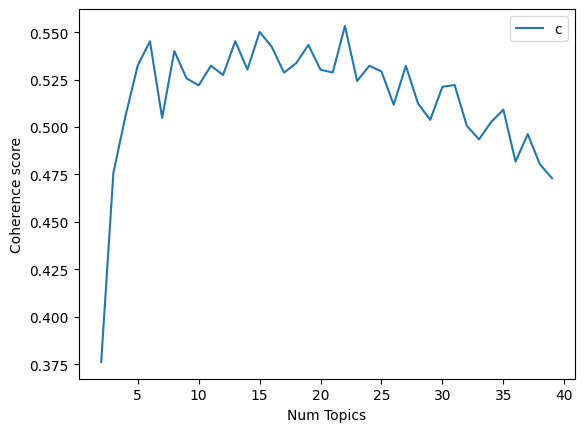

In [31]:
# =================================================-
#### Slide 20/24: Run compute_coherence_values function  ####

# np.random.seed(1)
# model_list, coherence_values = compute_coherence_values(
#     dictionary=dictionary,
#     corpus=corpus_tfidf,
#     texts=df_clean,
#     start=2,
#     limit=40,
#     step=1,
# )
# Plot graph of topic list.
# Show graph.

plt.plot(topic_range, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc="best")
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [32]:
topic_coh_dict = {k: v for (k, v) in zip(topic_range, coherence_scores)}

In [33]:
topic_range

range(2, 40)

In [34]:
chosen = [m for m in model_list if m.num_topics == 6]

In [35]:
chosen[0].num_topics

6

In [36]:
sorted(topic_coh_dict.items(), reverse=True, key=lambda x: x[1])[:5]

[(22, 0.5532806986962565),
 (15, 0.5501038406970452),
 (13, 0.5452273655241963),
 (6, 0.5451710053541036),
 (19, 0.5432601382928554)]

In [37]:
chosen = model_list[np.argmax(coherence_scores[:11])]

In [38]:
chosen.num_topics

6

In [39]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## Topic Modeling In N L P: Topic Modeling - 4 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [40]:
# =================================================-
#### Slide 5/29: Visualize topics generated with LDA  ####

# Prepare LDA vis object by providing:
vis = pyLDAvis.gensim.prepare(chosen, corpus_tfidf, dictionary)
# The function takes `vis` object that we prepared above as the main argument.
pyLDAvis.display(vis)

In [41]:
# =================================================-
#### Slide 16/29: Get topic probabilities for a document  ####

# Select the index of the document in corpus.
doc_num = 0
# Extract the vector of tf_idf weights for the document.
doc_vec = corpus_tfidf[doc_num]
print(doc_vec)
# Extract topic probabilities for that document.
doc_topics = chosen.get_document_topics(doc_vec)
print(doc_topics)
topic, prob = sorted(doc_topics, key=lambda x: x[1], reverse=True)[0]

[(0, 0.31942373876087665), (1, 0.3549009519669791), (2, 0.6118718565633235), (3, 0.3549009519669791), (4, 0.3059359282816618), (5, 0.22829905152454918), (6, 0.3549009519669791)]
[(0, 0.047575418), (1, 0.047402967), (2, 0.76214266), (3, 0.04768529), (4, 0.047728837), (5, 0.04746487)]


In [42]:
max(doc_topics, key=lambda x: x[1])

(2, 0.76214266)

In [43]:
prob_df = pd.DataFrame([max(
    chosen.get_document_topics(t),
    key=lambda x: x[1],
) for t in corpus_tfidf], columns=["topic", "prob"])

In [44]:
# =================================================-
#### Slide 17/29: Get topic probabilities for a document (cont'd)  ####

# # Initialize maximum probability score.
# max_prob = 0
# # Initialize best topic.
# best_topic = 0

# # Loop over all topics for the document.
# for topic in doc_topics:

#     if max_prob <= topic[1]:  # <- if current topic's probability is as high as max
#         max_prob = topic[1]  # <- make current topic's probability the new max
#         best_topic = topic[0]  # <- make current topic best

# # Create a tuple with information we just got.
# doc_topic_pair = (doc_num, best_topic, max_prob)
# print(doc_topic_pair)

In [45]:
# =================================================-
#### Slide 18/29: Get topic probabilities for a document (cont'd)  ####


# Put it all together into a function that returns a tuple
# with the index of the document, the best fit topic, and its probability.
# def GetDocTopicPair(doc_num, corpus, lda_model_tfidf):
#     # Extract the vector of tf_idf weights for the document.
#     doc_vec = corpus[doc_num]
#     # Extract topic probabilities for that document.
#     doc_topics = lda_model_tfidf.get_document_topics(doc_vec)
#     max_prob = 0
#     best_topic = 0
#     for topic in doc_topics:
#         if max_prob <= topic[1]:
#             max_prob = topic[1]
#             best_topic = topic[0]
#     doc_topic_pair = (doc_num, best_topic, max_prob)
#     return doc_topic_pair

In [46]:
# =================================================-
#### Slide 19/29: Get topic probabilities for all documents  ####

# Create an empty list of the same length as the number of documents.
# doc_topic_pairs = [None] * dictionary.num_docs

# # Loop through a range of document indices.
# for i in range(dictionary.num_docs):
#     # For each document index, get the document-topic tuple.
#     doc_topic_pairs[i] = GetDocTopicPair(i, corpus_tfidf, lda_model_tfidf)

# print(doc_topic_pairs[:10])

In [47]:
# =================================================-
#### Slide 20/29: Create a data frame with doc-topic assignments  ####

# Make a dataframe out of a list of tuples.
# doc_topic_pairs_df = pd.DataFrame(doc_topic_pairs)

# # Assign column names to the dataframe.
# doc_topic_pairs_df.columns = ["doc_id", "best_topic", "best_probability"]
# print(doc_topic_pairs_df.head())

In [48]:
prob_df.shape

(231, 2)

In [49]:
# =================================================-
#### Slide 21/29: Matching document ids to original data  ####

# Find indices of documents that we kept.

# Not necessary; already been done earlier

In [50]:
top_docs = [prob_df.query(f"topic=={i}").sort_values(by="prob", ascending=False).head(10) for i in range(6)]

In [51]:
top_docs[1].index

Index([123, 218, 122, 79, 54, 164, 167, 201, 96, 142], dtype='int64')

In [52]:
df.loc[top_docs[0].index, ["headline", "snippet"]]

,headline,snippet
160,South Korean 'Forced Labor' Plaintiffs Seek Ni...,South Korean plaintiffs in a World War Two for...
64,Trump Cancels Planned Davos Trip as Shutdown D...,U.S. President Donald Trump on Thursday cancel...
197,Man Arrested After Abuse of British Pro-EU Law...,A man was arrested on Saturday after a video o...
61,Somalia and Ousted UN Envoy Face Off at Securi...,A United Nations envoy who was recently ordere...
67,U.S. Government Shutdown May Depress January J...,A partial shutdown of the U.S. government coul...
219,Washington’s New Power Structure,Only Senate Republicans can make government work.
162,Congress Leaders Invited to White House for Bo...,President Donald Trump on Tuesday invited cong...
132,"Aiming at Trump, Democrats Lay Out Agenda for ...",House Democrats detailed an ambitious bill — i...
140,Pakistan's Ex-Prime Minister Appeals Sentence ...,Pakistan's former Prime Minister Nawaz Sharif ...
63,Air Traffic Controllers' Union Sues Over Unpai...,A union that represents thousands of U.S. air ...


In [53]:
df.loc[top_docs[1].index, ["headline", "snippet"]]

,headline,snippet
123,GOP Candidate: Board Change Limits Chance of N...,The Republican in the nation's last undecided ...
218,It’s 2019. Want Some Self-Improvement? Invest ...,"In a world where things often feel static, the..."
122,Sydney Set to Host Finals in Inaugural ATP Cup...,Sydney is set to host the finals of the inaugu...
79,Huawei Canada Exec Leaves Post as Scrutiny of ...,One of Huawei Canada's top executives on Frida...
54,U.S. Issues China Travel Advisory Amid Increas...,The U.S. State Department on Thursday renewed ...
164,Britain Testing 'No-Deal' Scenario as Brexit V...,Britain is testing how its motorway and ferry ...
167,U.S. Judge: Defense Lawyer's Conduct in Russia...,A U.S. judge said on Monday that a lawyer defe...
201,Anti-Govt Protests for 6th Week Against Serbia...,Several thousand people have turned out in Bel...
96,"Speaker Again, Pelosi Sees 'New Dawn' for 116t...",Cheering Democrats returned Nancy Pelosi to th...
142,Thousands March in Hong Kong Against China 'Re...,Thousands of demonstrators marched in Hong Kon...


In [54]:
df.loc[top_docs[2].index, ["headline", "snippet"]]

,headline,snippet
76,Government Shutdown Won't Delay Nevada Plutoni...,A federal court hearing will go forward as sch...
172,Head of Brazil's Environmental Protection Agen...,The head of Brazil's environmental protection ...
171,What to Expect at Gavin Newsom’s Inauguration,Monday: A new governor takes the reins; what y...
121,Capitals Rally in Third to Edge Red Wings 3-2,On another fruitless night for their power pla...
189,Trump Has 'Made No Decision' Whether to Declar...,U.S. President Donald Trump has not made a dec...
80,TV Station Backs Off Accusation That CNN Playe...,An executive at a San Diego television station...
69,"Avalanches, Accidents Bring Europe's Winter De...",Heavy snow paralyzed much of Europe for yet an...
62,Brazil's Bolsonaro Targets Minorities on 1st D...,Newly installed President Jair Bolsonaro targe...
58,Harrington to Be Named European Ryder Cup Captain,Padraig Harrington will be announced next week...
175,"As Men’s Team Tennis Events Rise, the Coed Hop...","The future of the Hopman Cup, the only coed te..."


In [55]:
df.loc[top_docs[3].index, ["headline", "snippet"]]

,headline,snippet
110,EU Open but Wary on British Interest in Brexit...,The European Union is looking at how Brexit mi...
118,"Pegi Young, 66, Musician Who Started a School ...","The mother of a child with cerebral palsy, she..."
75,Fed Officials Feared Adverse Market Reaction i...,Federal Reserve officials were worried about a...
2,Former NFL Player Wiley Talks Playoffs on Podc...,Marcellus Wiley is still on the fence about le...
124,Trump Says He Could Use Emergency Powers to Bu...,President Donald Trump said on Friday he could...
59,Candidate in Undecided House Race Meets With I...,The Latest on a North Carolina congressional r...
104,Italy PM Surprised by EU Decision on Fincantieri,Italian Prime Minister Giuseppe Conte said on ...
207,Irving Scores 17 in Return as Celtics Top Slop...,The Boston Celtics shared the ball extremely w...
199,Democrat Julian Castro Launches 2020 U.S. Pres...,"Texas Democrat Julian Castro, a former San Ant..."
211,Fed Nominee Nellie Liang Withdraws From Consid...,"The White House said Monday that Ms. Liang, an..."


In [56]:
df.loc[top_docs[4].index, ["headline", "snippet"]]

,headline,snippet
113,Mayor Says NYC Will Expand Health Coverage to ...,New York City will spend up to $100 million pe...
50,Thousands Rally in Belgrade Against Serbian Pr...,Thousands marched through Belgrade's frozen ci...
47,Thousands Rally Against Hungary's Overtime Wor...,Thousands marched through Budapest's city cent...
55,Hindu Hardliners Clash With Police Over Women ...,"Hindu hardliners vandalized shops, shut busine..."
194,Turkey's Military Reinforces on Border With Sy...,Turkish troops and tanks carried out military ...
155,Departure of Trump's GOP Critics in Senate Lea...,President Donald Trump's most prominent GOP cr...
196,South Africa's ANC Says Central Bank Should Br...,South Africa's ruling party said on Saturday t...
120,"Gore, Graft and More of What We’ve Learned So ...","The trial of Joaquín Guzmán Loera, the Mexican..."
174,India Force Rare Australia Follow-On in Sydney...,Australia were forced to follow-on on home soi...
9,Reaction to Andy Murray's Impending Retirement...,Following is reaction to Andy Murray's announc...


In [57]:
df.loc[top_docs[5].index, ["headline", "snippet"]]

,headline,snippet
68,Greek Minister Criticizes Police Over Clashes ...,Greece's public order minister strongly critic...
143,How Much Do You Know About Senegal?,Can you find Senegal on a map? What else do yo...
224,Is Kratom Nature’s Answer to Opioids?,A leaf from Southeast Asia is touted as a pain...
41,China's Population Set to Peak at 1.44 Billion...,China's population is set to reach a peak of 1...
147,Pope: Vatican Meeting Aims to 'Shed Full Light...,Pope Francis says next month's meeting of bish...
94,Chinese Phone Maker Huawei Punishes Employees ...,China's Huawei Technologies [HWT.UL] has punis...
102,Kim's Vision of a Coal-Fueled North Korean Fut...,When North Korean leader Kim Jong Un used his ...
228,Is Stunning an Animal Before Slaughter More Hu...,Two regions of Belgium are banning kosher and ...
1,UK Police Treating Manchester Stabbing Attack ...,British police confirmed on Tuesday they were ...
125,"Stocks Swing to Huge Gains After Jobs Report, ...",Global stocks soared Friday and reversed the b...


In [58]:
# =================================================-
#### Slide 22/29: Inspect documents for a given topic  ####

# Filter and sort all documents assigned to topic 3 by probability in descending order.
topic3_docs = prob_df.query("topic==2")
topic3_docs = topic3_docs.sort_values(by="prob", ascending=False)
print(topic3_docs.head())
# Let's see how many documents were assigned to that topic.
print(topic3_docs.shape)

     topic      prob
76       2  0.814458
172      2  0.796401
171      2  0.784431
121      2  0.781861
189      2  0.779126
(38, 2)


In [59]:
# =================================================-
#### Slide 23/29: Inspect documents for a given topic (cont'd)  ####

# Let's get the top 10 documents that were assigned to that topic.
top_10 = topic3_docs.index[0:10,]
# Inspect the top 10 documents in topic 3.
df_topic3 = df.loc[top_10, :]
print(df_topic3[["snippet"]])

                                               snippet
76   A federal court hearing will go forward as sch...
172  The head of Brazil's environmental protection ...
171  Monday: A new governor takes the reins; what y...
121  On another fruitless night for their power pla...
189  U.S. President Donald Trump has not made a dec...
80   An executive at a San Diego television station...
69   Heavy snow paralyzed much of Europe for yet an...
62   Newly installed President Jair Bolsonaro targe...
58   Padraig Harrington will be announced next week...
175  The future of the Hopman Cup, the only coed te...


In [60]:
# =================================================-
#### Slide 24/29: Save LDA visualization to HTML file  ####

# Save the plot as a self-contained HTML file.
pyLDAvis.save_html(vis, "plot/df_LDAvis.html")

In [61]:
# =================================================-
#### Slide 26/29: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################